In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [46]:
data_all = pd.read_csv("data/cereal.csv")

In [48]:
data_all.head()

,Cereals,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy,Fun,Kids,Soggy,Economical,Health,Family,Calories,Plain,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
0,Weetabix,5,5,5,1,2,1,5,4,1,4,5,5,5,5,1,3,1,4,1,1,3,5,1,1,5
1,SpecialK,1,2,2,1,5,2,5,1,1,5,3,5,2,5,1,5,5,1,2,1,5,2,1,1,3
2,SpecialK,5,4,5,5,5,3,5,5,5,5,3,3,5,5,1,1,5,4,3,1,2,5,4,1,5
3,CMuesli,5,5,5,3,5,2,5,5,5,5,3,3,5,5,1,1,1,4,2,5,2,5,5,1,5
4,CornFlakes,4,5,3,2,5,2,5,4,5,5,1,5,5,3,3,1,5,3,1,1,3,5,5,1,4


In [64]:
data=data_all

In [51]:
data = data_all.loc[data_all['Cereals'] == 'Weetabix']

In [65]:
data.head()

,Cereals,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy,Fun,Kids,Soggy,Economical,Health,Family,Calories,Plain,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
0,Weetabix,5,5,5,1,2,1,5,4,1,4,5,5,5,5,1,3,1,4,1,1,3,5,1,1,5
1,SpecialK,1,2,2,1,5,2,5,1,1,5,3,5,2,5,1,5,5,1,2,1,5,2,1,1,3
2,SpecialK,5,4,5,5,5,3,5,5,5,5,3,3,5,5,1,1,5,4,3,1,2,5,4,1,5
3,CMuesli,5,5,5,3,5,2,5,5,5,5,3,3,5,5,1,1,1,4,2,5,2,5,5,1,5
4,CornFlakes,4,5,3,2,5,2,5,4,5,5,1,5,5,3,3,1,5,3,1,1,3,5,5,1,4


In [66]:
X= data.iloc[:,1:]
y = data['Cereals']

In [67]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(2888.0383997711297, 0.0)

In [68]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)

In [69]:
kmo_model

0.8546819902562227

In [70]:
fa = FactorAnalyzer()

In [71]:
fa.analyze(X,rotation='quartimax')

In [72]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,6.504468
1,3.821045
2,2.501995
3,1.683994
4,1.085354
5,0.933007
6,0.851641
7,0.786837
8,0.731717
9,0.695851


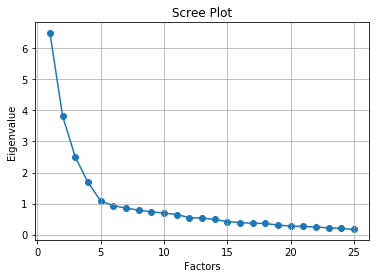

In [73]:
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [44]:
fa1 = FactorAnalyzer()
fa1.analyze(X, 4, rotation="quartimax")
fa1.loadings

,Factor1,Factor2,Factor3,Factor4
Filling,0.717058,0.162076,0.152877,0.068997
Natural,0.770899,-0.142459,0.003184,-0.010516
Fibre,0.817296,-0.047337,-0.176367,-0.040445
Sweet,0.039382,0.743746,0.076310,0.250510
Easy,0.257564,0.089502,0.309012,0.027970
Salt,-0.158628,0.659803,0.024278,-0.156729
Satisfying,0.655379,0.146842,0.382188,0.092993
Energy,0.676680,0.156127,0.149898,0.132590
Fun,0.214206,0.248357,0.411376,0.428740
Kids,0.030289,0.032823,0.850768,-0.006251


In [45]:
pd.DataFrame(fa1.loadings,index=X.columns).to_csv("data/cereal_factors.csv")

In [77]:
fa1.get_scores(X)

,Factor1,Factor2,Factor3,Factor4
0,1.479437,-1.300733,0.071057,-1.598479
1,-2.001821,-0.895601,1.486800,-0.909203
2,1.513330,1.005064,0.999652,0.427287
3,1.754258,0.205475,0.405975,0.862343
4,0.657887,-0.605353,1.142899,1.197127
5,0.451847,-0.126161,1.423932,1.154917
6,0.613486,-0.406580,1.556172,1.351398
7,-0.162337,-1.029228,1.266202,0.515919
8,-0.162337,-1.029228,1.266202,0.515919
9,-0.162337,-1.029228,1.266202,0.515919


In [40]:
fa1.get_communalities()

,Communalities
Filling,0.589611
Natural,0.637965
Fibre,0.727750
Sweet,0.646405
Easy,0.170273
Salt,0.495161
Satisfying,0.617540
Energy,0.525082
Fun,0.455352
Kids,0.718840


In [42]:
fa1.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,5.633625,2.759993,2.407471,1.895559,0.578207
Proportion Var,0.225345,0.110400,0.096299,0.075822,0.023128
Cumulative Var,0.225345,0.335745,0.432044,0.507866,0.530994


In [43]:
fa1.get_uniqueness()

,Uniqueness
Filling,0.410389
Natural,0.362035
Fibre,0.272250
Sweet,0.353595
Easy,0.829727
Salt,0.504839
Satisfying,0.382460
Energy,0.474918
Fun,0.544648
Kids,0.281160
